In [1]:
# we must know the experiment index, ideally also know the temperature
Temper_i = 273.15 + 25
index_exp = 2

In [2]:
# magic lines that avoid re-start 
%load_ext autoreload
%autoreload 2

In [3]:
import pybamm as pb;import pandas as pd   ;import numpy as np;
import os; import seaborn as sns
import matplotlib.pyplot as plt;import os;import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
import scipy.optimize
import timeit
import random;import time, signal
fs=17; # python -m ipykernel install --user --name=EnvPBGEM_Linux --display-name "Python_Linux"
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [4]:
# define global index and dict for all experiment data - prepare for read!
Exp_Path = [
    "Expt 1 - Si-based Degradation/",
    "Expt 2,2 - C-based Degradation 2/",
    "Expt 3 - Cathode Degradation and Li-Plating/",
    "Expt 4 - Drive Cycle Aging (Control)/",
    "Expt 5 - Standard Cycle Aging (Control)/",]
Exp_head = [
    "Expt 1",
    "Expt 2,2",
    "Expt 3",
    "Expt 4",
    "Expt 5",]
Exp_1_Cell = ["A","B","J","D","E","F","K","L","M"];
Exp_1_Temp = {
    "A":"10","B":"10","J":"10",
    "D":"25","E":"25","F":"25",
    "K":"40","L":"40","M":"40",}
Temp_Cell_Exp_1 = {
    "10":["A","B","J"],
    "25":["D","E","F"],
    "40":["K","L","M"],}
Exp_2_Cell = ["A","B","C","D","E","F"];
Exp_2_Temp = {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",}
Temp_Cell_Exp_2 = {
    "10":["A","B"],
    "25":["C","D"],
    "40":["E","F"],}
Exp_3_Cell = ["A","B","C","D","E","F","G","H","I"];
Exp_3_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25","F":"25",
    "G":"40","H":"40","I":"40"}
Temp_Cell_Exp_3 = {
    "10":["A","B","C"],
    "25":["D","E","F"],
    "40":["G","H","I"],}
Exp_4_Cell = ["A","B","C","D","E","F","G","H"];
Exp_4_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_4 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_5_Cell = ["A","B","C","D","E","F","G","H"];
Exp_5_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_5 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_All_Cell  = [Exp_1_Cell,Exp_2_Cell,Exp_3_Cell,Exp_4_Cell,Exp_5_Cell]
Exp_Temp_Cell = [Exp_1_Temp,Exp_2_Temp,Exp_3_Temp,Exp_4_Temp,Exp_5_Temp]
Temp_Cell_Exp_All = [Temp_Cell_Exp_1,Temp_Cell_Exp_2,Temp_Cell_Exp_3,Temp_Cell_Exp_4,Temp_Cell_Exp_5]
Mark_Cell_All = [
    {
    "A":"o","B":">","J":"v",
    "D":"o","E":">","F":"v",
    "K":"o","L":">","M":"v",},
    {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">","F":"v",
    "G":"o","H":">","I":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",}]
Color_Cell_All = [
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"J":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "K":[1,0,0,0.4],"L":[1,0,0,0.4],"M":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"C":[0, 0, 0,0.7],
    "E":[1,0,0,0.4],"F":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "G":[1,0,0,0.4],"H":[1,0,0,0.4],"I":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],}]


In [5]:
# ready experiment data
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip/Rio_Code/Fun_P2"))
sys.path.append(str_path_1) 
from Fun_P2 import * # directly do this for HPC
# Load Niall's data
Path_NiallDMA = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/InputData/") 
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 
Exp_Any_AllData = Read_Exp(
    Path_NiallDMA,Exp_All_Cell[index_exp-1],
    Exp_Path,Exp_head,Exp_Temp_Cell[index_exp-1],
    index_exp-1)

Finish reading Experiment!


In [ ]:
# Reload all 1000 scans  
BasicPath = os.path.expanduser(
    "~/EnvPBGEM_Linux/SimSave/P2_R9_Dim/Exp2_Latin_6para_200cases/") # for Linux
Big_start = 1; Big_end = 200; case_no=10;
purpose = "Exp2_Latin_6para_200cases_wideRange"
Scan_start_all = (
    np.arange(Big_start,Big_end+1,case_no)
    ).tolist()
Scan_end_all = (
    np.arange(Big_start+case_no-1,Big_end+case_no,case_no)
    ).tolist()
# create the empty notebook
workbook = openpyxl.Workbook() 
sheet = workbook.active  
excel_name = "Summary of 200 cases"
sheet_title = "Summary" 
sheet.title = sheet_title
workbook.save(BasicPath+f"{excel_name}.xlsx" )
print("Create the summary file for the 200 cases")

# check whether all cases succeed, if so, it should contains a png file start with 0_Scan
def Check_all_succeed(Scan_start,Scan_end,BasicPath):
    # List all files in the folder   
    target_folder = BasicPath + f"{purpose}_Case_{Scan_start}_{Scan_end}" 
    #print(target_folder)
    files = os.listdir(target_folder)
    # Check if any file matches the criteria
    Flag_all_succeed = False
    for file_name in files:
        if file_name.endswith('.png') and '0_Scan' in file_name:
            Flag_all_succeed = True
            break
    if Flag_all_succeed:
        print(f"All cases succeed from {Scan_start} to {Scan_end}")
    else:
        print(f"Some cases failed from {Scan_start} to {Scan_end}")
    return Flag_all_succeed

def Plot_summary(Scan_start,Scan_end,Temper_i,Exp_Any_AllData,dpi):
    Indexs =np.arange(Scan_start-1,Scan_end)
    index_list = Indexs+1
    All_Scans = {}
    for scan in index_list:
        All_Scans[str(scan)]={}
        try:
            All_Scans[str(scan)] = loadmat( 
            BasicPath + f"{purpose}_Case_{Scan_start}_{Scan_end}/" 
            +  "Mats/" + str(scan)+ "-Ageing_summary_only.mat")
        except:
            print(f"Nothing in Scan {scan}")
    # plot
    Num_subplot = 5;
    fig, axs = plt.subplots(Num_subplot,1, figsize=(6,13),tight_layout=True)
    cm = mpl.cm.get_cmap("cool", len(index_list))  
    for i,scan in enumerate(index_list):
        try:
            axs[0].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]['CDend SOH [%]'][0],     
                '-o',color=cm(i),  ) # label="Scan=" + str(scan)
            axs[1].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]["CDend LLI [%]"][0],'-o',color=cm(i), )
            axs[2].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_ne [%]"][0],'-o',   color=cm(i),   ) 
            axs[3].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_pe [%]"][0],    '-o', color=cm(i),  ) 
            axs[4].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                np.array(All_Scans[str(scan)]["Res_0p5C_50SOC"][0]),   '-o', color=cm(i), )
        except:
            pass
        else:
            pass 
    # Plot Charge Throughput (A.h) vs SOH
    color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
    color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";

    Exp_temp_i_cell = Temp_Cell_Exp[str(int(Temper_i- 273.15))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(Temper_i- 273.15))]
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[0].plot(
            chThr_temp,np.array(df_DMA["SoH"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}") 
        axs[1].plot(
            chThr_temp,np.array(df_DMA["LLI"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}")  
        axs[2].plot(
            chThr_temp,np.array(df_DMA["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp, )
        axs[3].plot(
            chThr_temp,np.array(df_DMA["LAM PE"])*100,
            color=color_exp,marker=marker_exp,)
        # update 230312- plot resistance here
        df = Exp_Any_AllData[cell]["Extract Data"]
        # Exp_1_AllData["A"]["Extract Data"]["0.1s Resistance (Ohms)"]
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[4].plot(
            #df["Days of degradation"][index_Res],
            np.array(df["Charge Throughput (A.h)"][index_Res])/1e3,
            np.array(df["0.1s Resistance (Ohms)"][index_Res])*1e3,
            color=color_exp,marker=marker_exp)
    # Update 230518: Plot Experiment Average - at 1 expeirment and 1 temperature
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg]  = XY_pack
    axs[0].plot(
        X_1_st,Y_1_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    axs[1].plot(
        X_1_st,Y_2_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg")  
    axs[2].plot(
        X_1_st,Y_3_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg, )
    axs[3].plot(
        X_1_st,Y_4_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg,)
    axs[4].plot(
        X_5_st,Y_5_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg)
    axs[0].set_ylabel("SOH %")
    axs[1].set_ylabel("LLI %")
    axs[2].set_ylabel("LAM NE %")
    axs[3].set_ylabel("LAM PE %")
    axs[4].set_ylabel(r"Lump resistance [m$\Omega$]")
    axs[4].set_xlabel("Charge Throughput (kA.h)")
    for i in range(0,Num_subplot):
        labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
    axs[4].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    axs[0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    axs[1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    fig.suptitle(
        f"0_Scan {index_list[0]}-{index_list[-1]}-Exp-{index_exp}-{str(int(Temper_i- 273.15))}"
        +r"$^\circ$C - Summary", fontsize=fs+2)
    plt.savefig(
        BasicPath + f"{purpose}_Case_{Scan_start}_{Scan_end}/" +  
        f"0_Scan {index_list[0]}-{index_list[-1]}-Exp-{index_exp}-{str(int(Temper_i- 273.15))}degC Summary.png", dpi=dpi)
    plt.close() 
    return

def Collect_1case_Excel(Scan_start,Scan_end):
    Indexs =np.arange(Scan_start-1,Scan_end)
    Index_List_succeed = Indexs+1
    Round_No = f"Case_{Scan_start}_{Scan_end}"  
    book_name_xlsx = f'{purpose}_{Round_No}.xlsx';
    sheet_name_xlsx = 'Results';
    for k,index_i in enumerate(Index_List_succeed):
        #print(index_i)
        try:
            old_book = str(index_i) + '_' + book_name_xlsx
            #print(old_book)
            #open excel:
            data_old = openpyxl.load_workbook(
                BasicPath + f"{purpose}_Case_{Scan_start}_{Scan_end}/" +   "Excel/" + old_book)   
            data_tar = openpyxl.load_workbook(
                BasicPath + f"{purpose}_Case_{Scan_start}_{Scan_end}/" +   book_name_xlsx) 

            table_old = data_old[str(index_i)]
            nrows_old = table_old.max_row  # 获得行数
            ncolumns_old = table_old.max_column  # 获得列数

            table_tar = data_tar[sheet_name_xlsx]
            nrows_tar = table_tar.max_row # ncolumns_old + k +1 # Mark!!! Most important changes!
            ncolumns_old = table_old.max_column  # 获得列数
            list_old = [];
            #print(nrows_old,nrows_tar)
            for i in range(1,nrows_old+1):
                for j in range(1,ncolumns_old+1):
                    list_old.append(table_old.cell(row=i,column=j).value)
            
            list_old = [list_old,]
            for i in range(1, len(list_old)+1):
                    for j in range(1, len(list_old[i-1])+1):
                        #print(i,j,list_old[i-1][j-1]    )
                        table_tar.cell(nrows_tar+i, j).value = list_old[i-1][j-1]     
            data_tar.save(
                BasicPath + f"{purpose}_Case_{Scan_start}_{Scan_end}/" 
                + book_name_xlsx) 
            data_tar.close()
        except:
            print(f"Something goes wrong for Scan {index_i}!")
        else:
            print(f"Successfuly write results for Scan {index_i}!") 
    return

# save all results into the summary file
def Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title):
    # Open the source workbook
    Round_No = f"Case_{Scan_start}_{Scan_end}"  
    book_name_xlsx = f'{purpose}_{Round_No}.xlsx';
    source_workbook = openpyxl.load_workbook(
        filename=BasicPath + f"{purpose}_Case_{Scan_start}_{Scan_end}/" 
        + book_name_xlsx)
    # Open the target workbook
    target_workbook = openpyxl.load_workbook(
        BasicPath+f"{excel_name}.xlsx" )
    # Get the active sheet of the source workbook
    source_sheet = source_workbook.active
    # Get the target sheet by name
    target_sheet = target_workbook[sheet_title]

    # Copy the values and formatting from the source sheet to the target sheet
    if Scan_start==1:
        for row in source_sheet.iter_rows(values_only=True):
            target_sheet.append(row)
    else:
        for row in source_sheet.iter_rows(values_only=True):
            if row != next(source_sheet.iter_rows(values_only=True)):
                target_sheet.append(row)

    # Save the changes to the target workbook
    target_workbook.save(BasicPath+f"{excel_name}.xlsx")
    print(f"Successfully collect Case_{Scan_start}_{Scan_end}")
    return 
# collect all results:
for Scan_start,Scan_end in zip(Scan_start_all,Scan_end_all):
    Flag_all_succeed = Check_all_succeed(Scan_start,Scan_end,BasicPath)
    if Flag_all_succeed:
        Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title)
    else:
        # first, plot summary
        Plot_summary(Scan_start,Scan_end,Temper_i,Exp_Any_AllData,dpi=100)
        # then collect single cases into a summary of the 10 cases
        Collect_1case_Excel(Scan_start,Scan_end)
        # finally, collect the 10 cases into a bigger file
        Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title)

In [9]:
# tidy up the 1000 cases - delete the rows with "Unknown" - should upgrade in the future to keep 
from openpyxl import load_workbook
workbook = load_workbook(filename=BasicPath+f"{excel_name}.xlsx")
sheet = workbook.active
# Convert rows to a list and iterate over it in reverse order
rows = list(sheet.iter_rows(values_only=True))
for row in reversed(range(len(rows))):
    if "Unknown" in rows[row]:
        sheet.delete_rows(row + 1)  # Delete the row
workbook.save(filename=BasicPath+f"{excel_name}.xlsx")

In [ ]:
# replot everything:
BasicPath = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/P2_R9_Dim/Exp2_Latin_6para_200cases/") # for Linux
if not os.path.exists(BasicPath + "Plots_collect"):
   os.mkdir(BasicPath + "Plots_collect");
if not os.path.exists(BasicPath + "Plots_collect/Allscans"):
   os.mkdir(BasicPath + "Plots_collect/Allscans");

Big_start = 1; Big_end = 200; case_no=10;
Scan_start_all = (
    np.arange(Big_start,Big_end+1,case_no)
    ).tolist()
Scan_end_all = (
    np.arange(Big_start+case_no-1,Big_end+case_no,case_no)
    ).tolist()
# cre
def Plot_summary2(Scan_start,Scan_end,Temper_i,Exp_Any_AllData,dpi):
    Indexs =np.arange(Scan_start-1,Scan_end)
    index_list = Indexs+1
    All_Scans = {}
    for scan in index_list:
        All_Scans[str(scan)]={}
        try:
            All_Scans[str(scan)] = loadmat( 
            BasicPath + f"{purpose}_Case_{Scan_start}_{Scan_end}/" 
            +  "Mats/" + str(scan)+ "-Ageing_summary_only.mat")
        except:
            print(f"Nothing in Scan {scan}")
    # plot
    Num_subplot = 5;
    fig, axs = plt.subplots(Num_subplot,1, figsize=(6,13),tight_layout=True)
    cm = mpl.cm.get_cmap("cool", len(index_list))  
    for i,scan in enumerate(index_list):
        try:
            axs[0].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]['CDend SOH [%]'][0],     
                '-o',color=cm(i),  ) # label="Scan=" + str(scan)
            axs[1].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]["CDend LLI [%]"][0],'-o',color=cm(i), )
            axs[2].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_ne [%]"][0],'-o',   color=cm(i),   ) 
            axs[3].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_pe [%]"][0],    '-o', color=cm(i),  ) 
            axs[4].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                np.array(All_Scans[str(scan)]["Res_0p5C_50SOC"][0]),   '-o', color=cm(i), )
        except:
            pass
        else:
            pass 
    # Plot Charge Throughput (A.h) vs SOH
    color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
    color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";

    Exp_temp_i_cell = Temp_Cell_Exp[str(int(Temper_i- 273.15))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(Temper_i- 273.15))]
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[0].plot(
            chThr_temp,np.array(df_DMA["SoH"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}") 
        axs[1].plot(
            chThr_temp,np.array(df_DMA["LLI"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}")  
        axs[2].plot(
            chThr_temp,np.array(df_DMA["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp, )
        axs[3].plot(
            chThr_temp,np.array(df_DMA["LAM PE"])*100,
            color=color_exp,marker=marker_exp,)
        # update 230312- plot resistance here
        df = Exp_Any_AllData[cell]["Extract Data"]
        # Exp_1_AllData["A"]["Extract Data"]["0.1s Resistance (Ohms)"]
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[4].plot(
            #df["Days of degradation"][index_Res],
            np.array(df["Charge Throughput (A.h)"][index_Res])/1e3,
            np.array(df["0.1s Resistance (Ohms)"][index_Res])*1e3,
            color=color_exp,marker=marker_exp)
    # Update 230518: Plot Experiment Average - at 1 expeirment and 1 temperature
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg]  = XY_pack
    axs[0].plot(
        X_1_st,Y_1_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    axs[1].plot(
        X_1_st,Y_2_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg")  
    axs[2].plot(
        X_1_st,Y_3_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg, )
    axs[3].plot(
        X_1_st,Y_4_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg,)
    axs[4].plot(
        X_5_st,Y_5_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg)
    axs[0].set_ylabel("SOH %")
    axs[1].set_ylabel("LLI %")
    axs[2].set_ylabel("LAM NE %")
    axs[3].set_ylabel("LAM PE %")
    axs[4].set_ylabel(r"Lump resistance [m$\Omega$]")
    axs[4].set_xlabel("Charge Throughput (kA.h)")
    for i in range(0,Num_subplot):
        labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
    axs[4].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    axs[0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    axs[1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    fig.suptitle(
        f"1_Scan {index_list[0]}-{index_list[-1]}-Exp-{index_exp}-{str(int(Temper_i- 273.15))}"
        +r"$^\circ$C - Summary", fontsize=fs+2)
    plt.savefig(
        BasicPath + f"Plots_collect/Allscans/" +  
        f"0_Scan {index_list[0]}-{index_list[-1]}-Exp-{index_exp}-{str(int(Temper_i- 273.15))}degC Summary.png", dpi=dpi)
    plt.close() 
    return

for Scan_start,Scan_end in zip(Scan_start_all,Scan_end_all):
    Plot_summary2(Scan_start,Scan_end,Temper_i,Exp_Any_AllData,dpi=300)
    

In [16]:
# Post-processing - using ML knowledge
# Read the Excel file into a DataFrame
df = pd.read_excel(BasicPath+"Summary of 200 cases.xlsx")
# Display the DataFrame
print(df.head())
column_mapping = {
    "Inner SEI lithium interstitial diffusivity [m2.s-1]":"Dint",
    "Dead lithium decay constant [s-1]":"Decay",
    "Lithium plating kinetic rate constant [m.s-1]"	:"k_LiP",
    "Negative electrode LAM constant proportional term [s-1]"	:"pLAM_Ne",
    "Negative electrode cracking rate":"k_Ne_cr",
    "Outer SEI partial molar volume [m3.mol-1]":"V_SEI",	
}
# Rename the columns using the mapping   - Error_1~6;   Para_1~8
df = df.rename(columns=column_mapping)

   Scan No  Exp No. Y or N  Error Tot%  Error SOH %  Error LLI %   
0        1        2   Fail         495            1            1  \
1        2        2   Fail         542            9            9   
2        3        2   Fail          27           20           14   
3        4        2   Fail         550           10           10   
4        5        2   Fail          11            5            6   

   Error LAM NE %  Error LAM PE %  Error Res % Dry out  ...  LLI to LiP   
0               1               0           42      On  ...    0.006177  \
1               8               8           35      On  ...    0.000002   
2              23               2           25      On  ...    0.000081   
3               9               9           30      On  ...    0.000032   
4               4               4           45      On  ...    0.013546   

     LLI to SEI  LLI to sei-on-cracks  LAM to Neg  LAM to Pos   
0  2.461473e-07              0.000167    0.145764    0.000000  \
1  1.39893

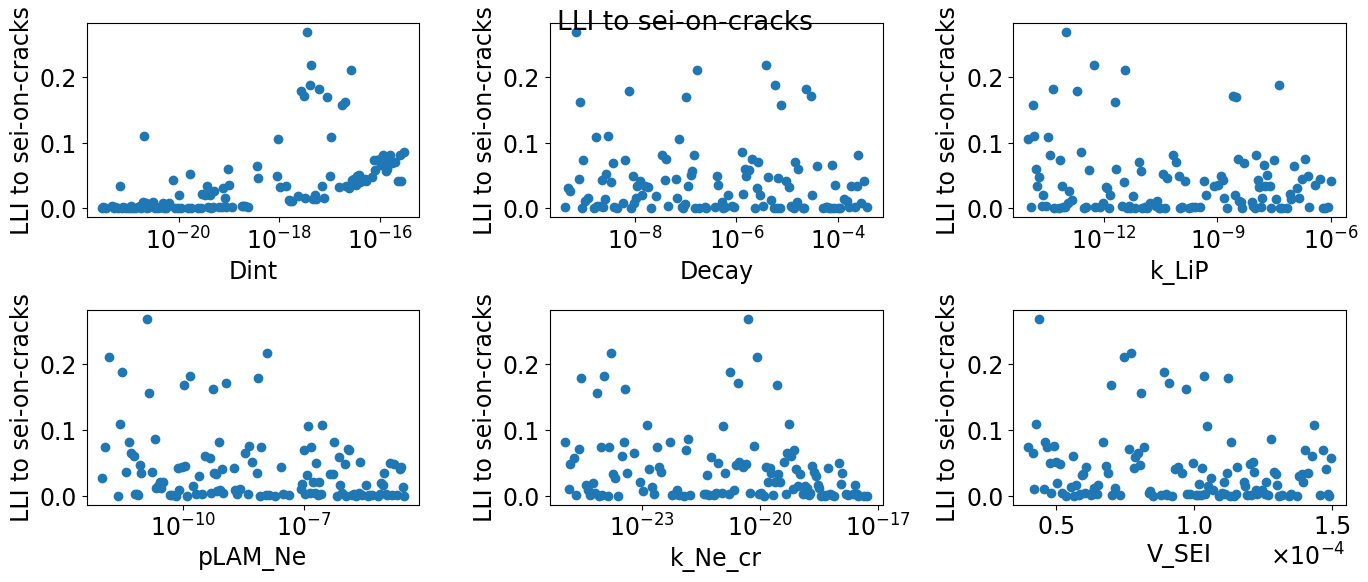

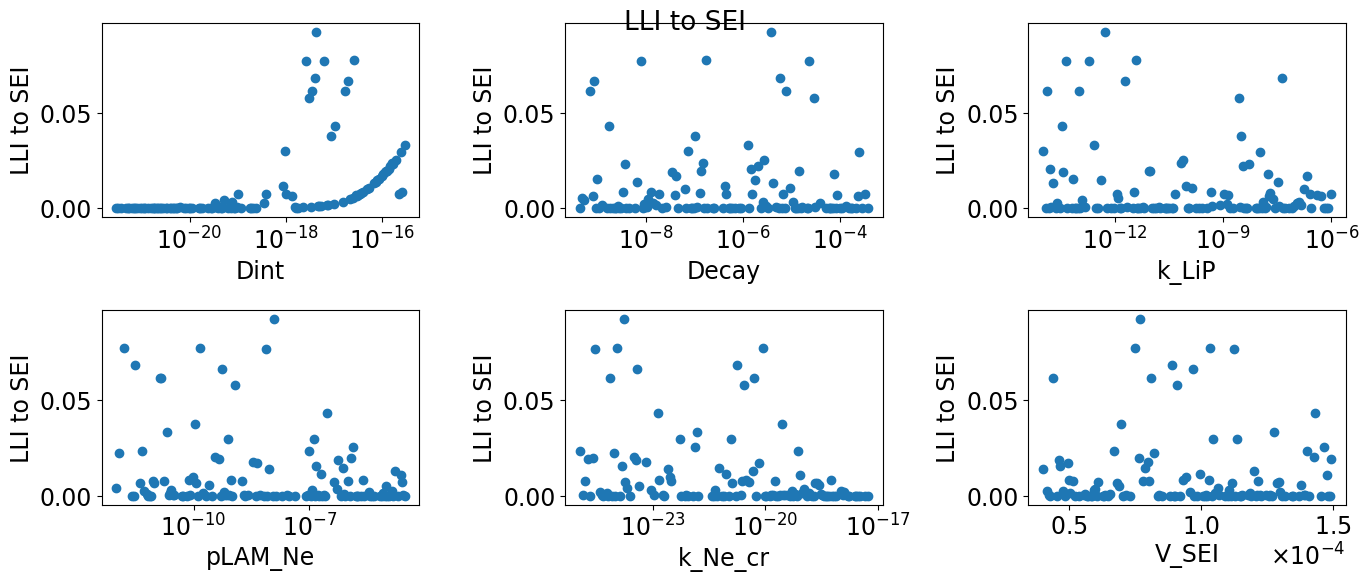

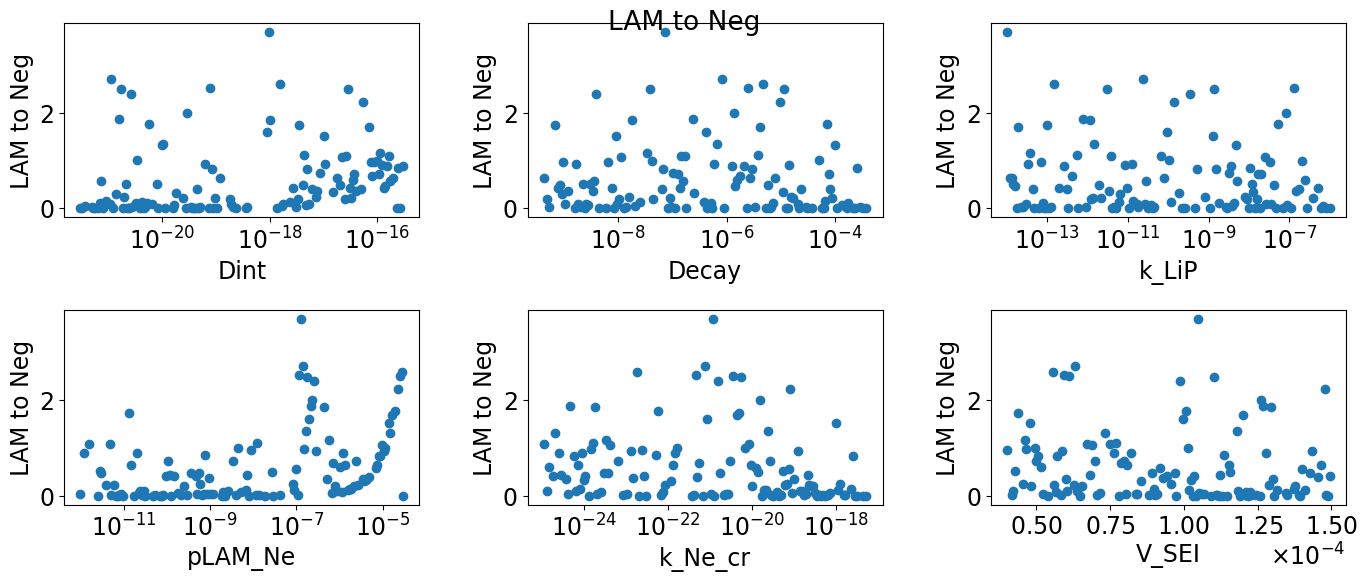

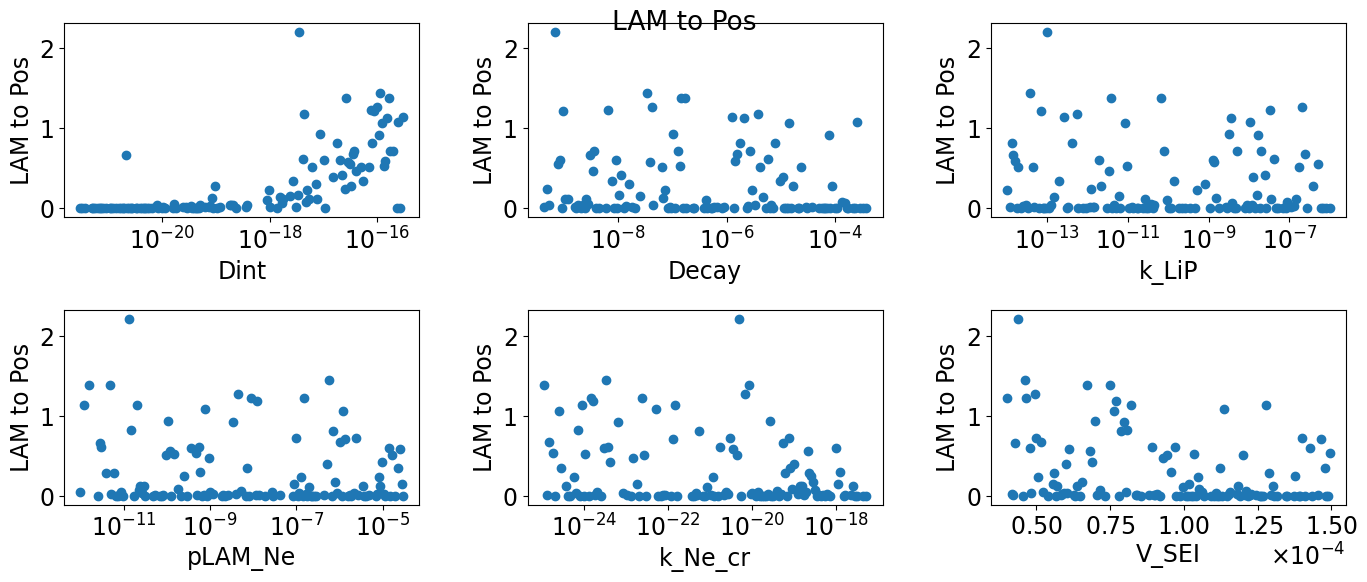

In [29]:
# relevant input:
input_columns = [
    "Dint","Decay","k_LiP",
    "pLAM_Ne","k_Ne_cr","V_SEI"]
""" 
Error Tot%   Error SOH %   Error LLI % 
Error LAM NE %  Error LAM PE %	Error Res %
Cap Loss	
LLI to LiP	
LLI to SEI	
LLI to sei-on-cracks	
LAM to Neg	LAM to Pos	
Vol_Elely_Tot Final	
Vol_Elely_JR Final	
Width Final  """

def Plot_Single_Out(df, input_columns, output_column):
    fig, axes = plt.subplots(2, 3, figsize=(14, 6))
    axes = axes.flatten()
    # Plot input-output relationship in subplots
    for i, column in enumerate(input_columns):
        ax = axes[i]
        ax.scatter(df[column], df[output_column])
        ax.set_xlabel(column)
        ax.set_ylabel(output_column)
        if i < len(input_columns) - 1:
            ax.set_xscale('log')
    ax_last = axes[-1]
    ax_last.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True))
    ax_last.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    plt.tight_layout()
    fig.suptitle(f"{output_column}", fontsize=fs+2)

#Plot_Single_Out(df,input_columns,output_column="Error Tot%")
Plot_Single_Out(df,input_columns,output_column="LLI to sei-on-cracks")
Plot_Single_Out(df,input_columns,output_column="LLI to SEI")
Plot_Single_Out(df,input_columns,output_column="LAM to Neg")
Plot_Single_Out(df,input_columns,output_column="LAM to Pos")

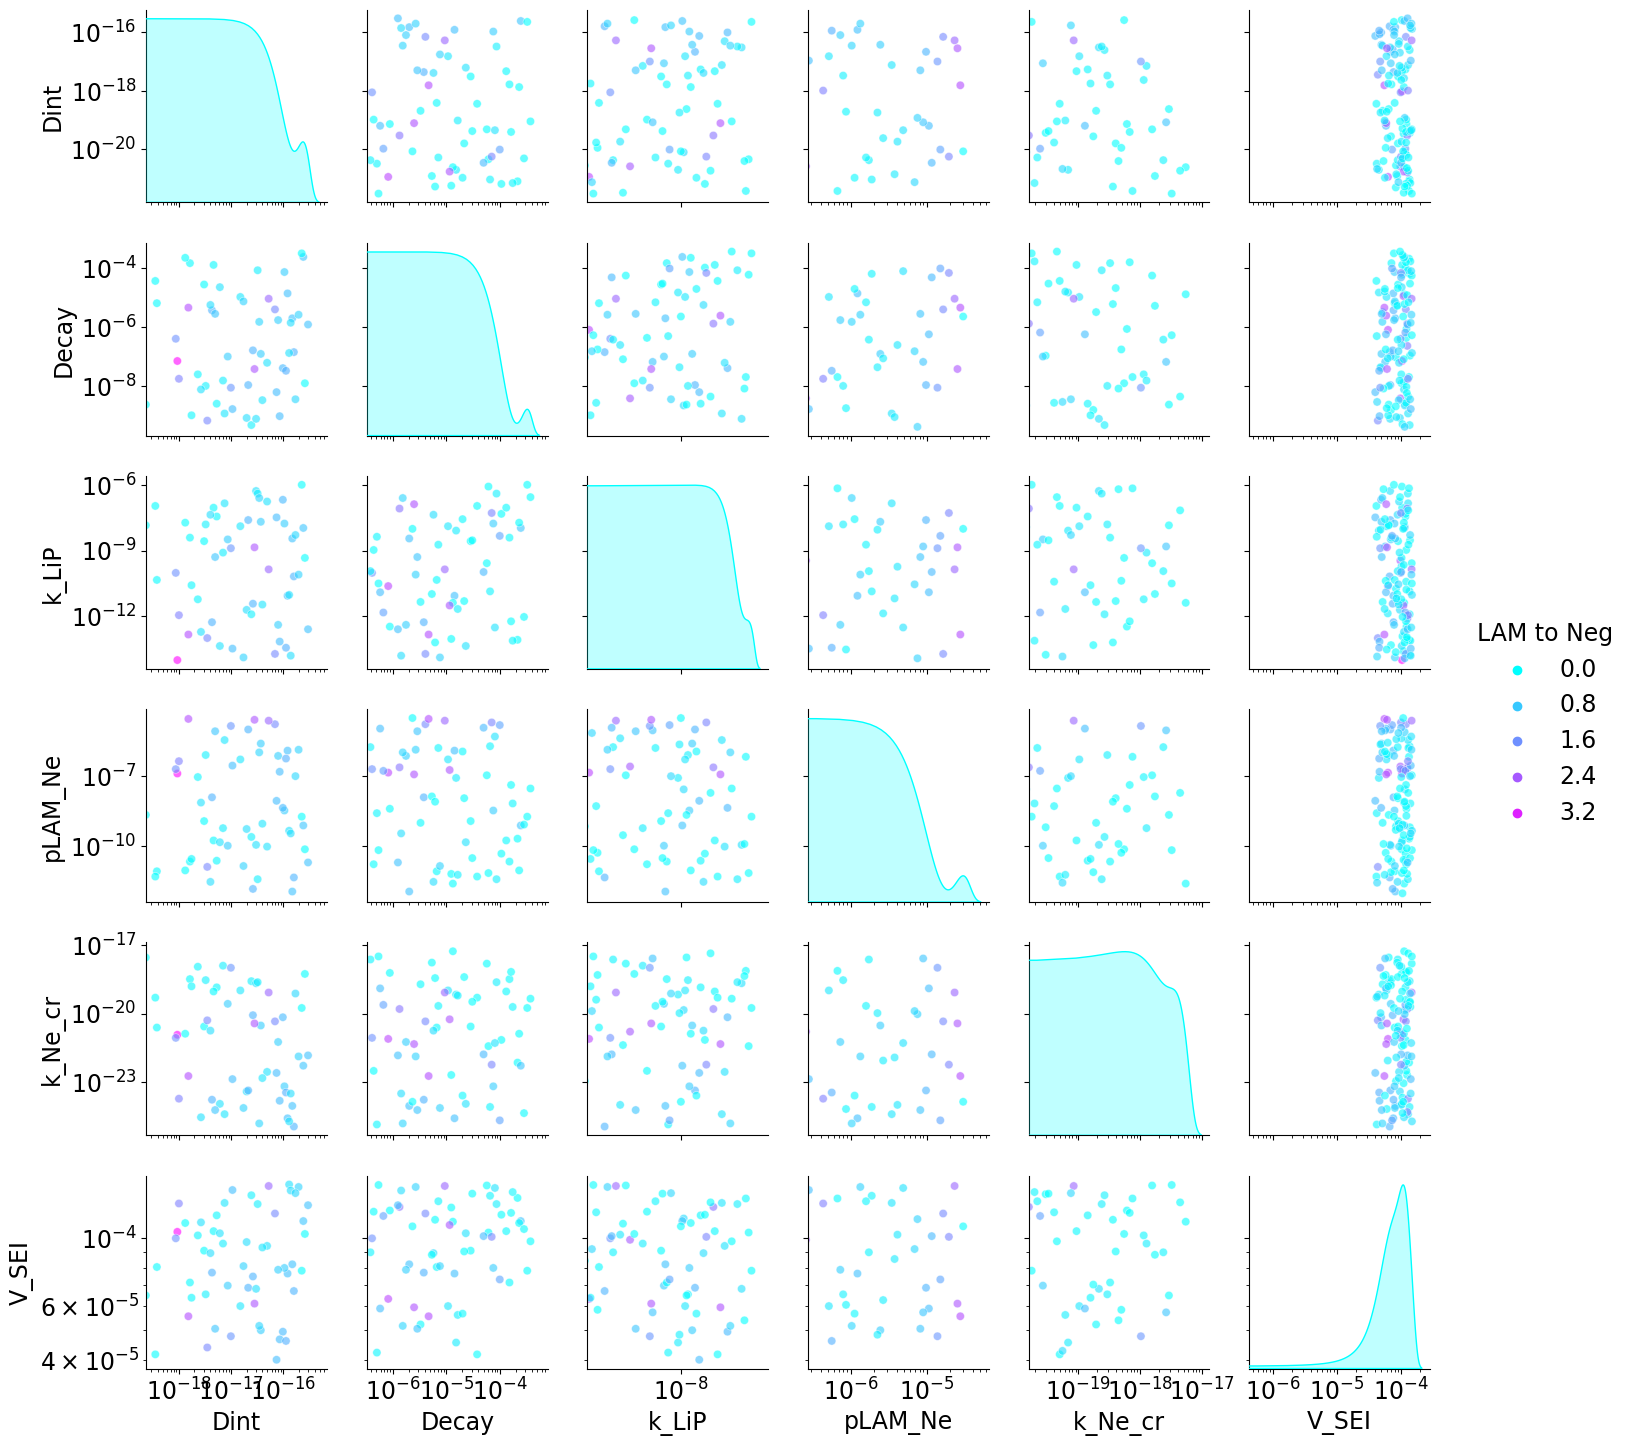

In [32]:
import seaborn as sns
def PlotPair(df, input_columns, output_column):
    # Create a DataFrame with only the input and output columns
    data_scale = df[input_columns + [output_column]]
    # Create the pair plot
    g = sns.pairplot(
        data_scale, vars=input_columns, hue=output_column,
        diag_kind='kde', plot_kws={'alpha': 0.6}, palette='cool')

    # Set x-axis and y-axis scales to log scale
    for ax in g.axes.flat:
        ax.set_xscale('log')
        ax.set_yscale('log')

    return

PlotPair(df, input_columns, output_column="LAM to Neg")


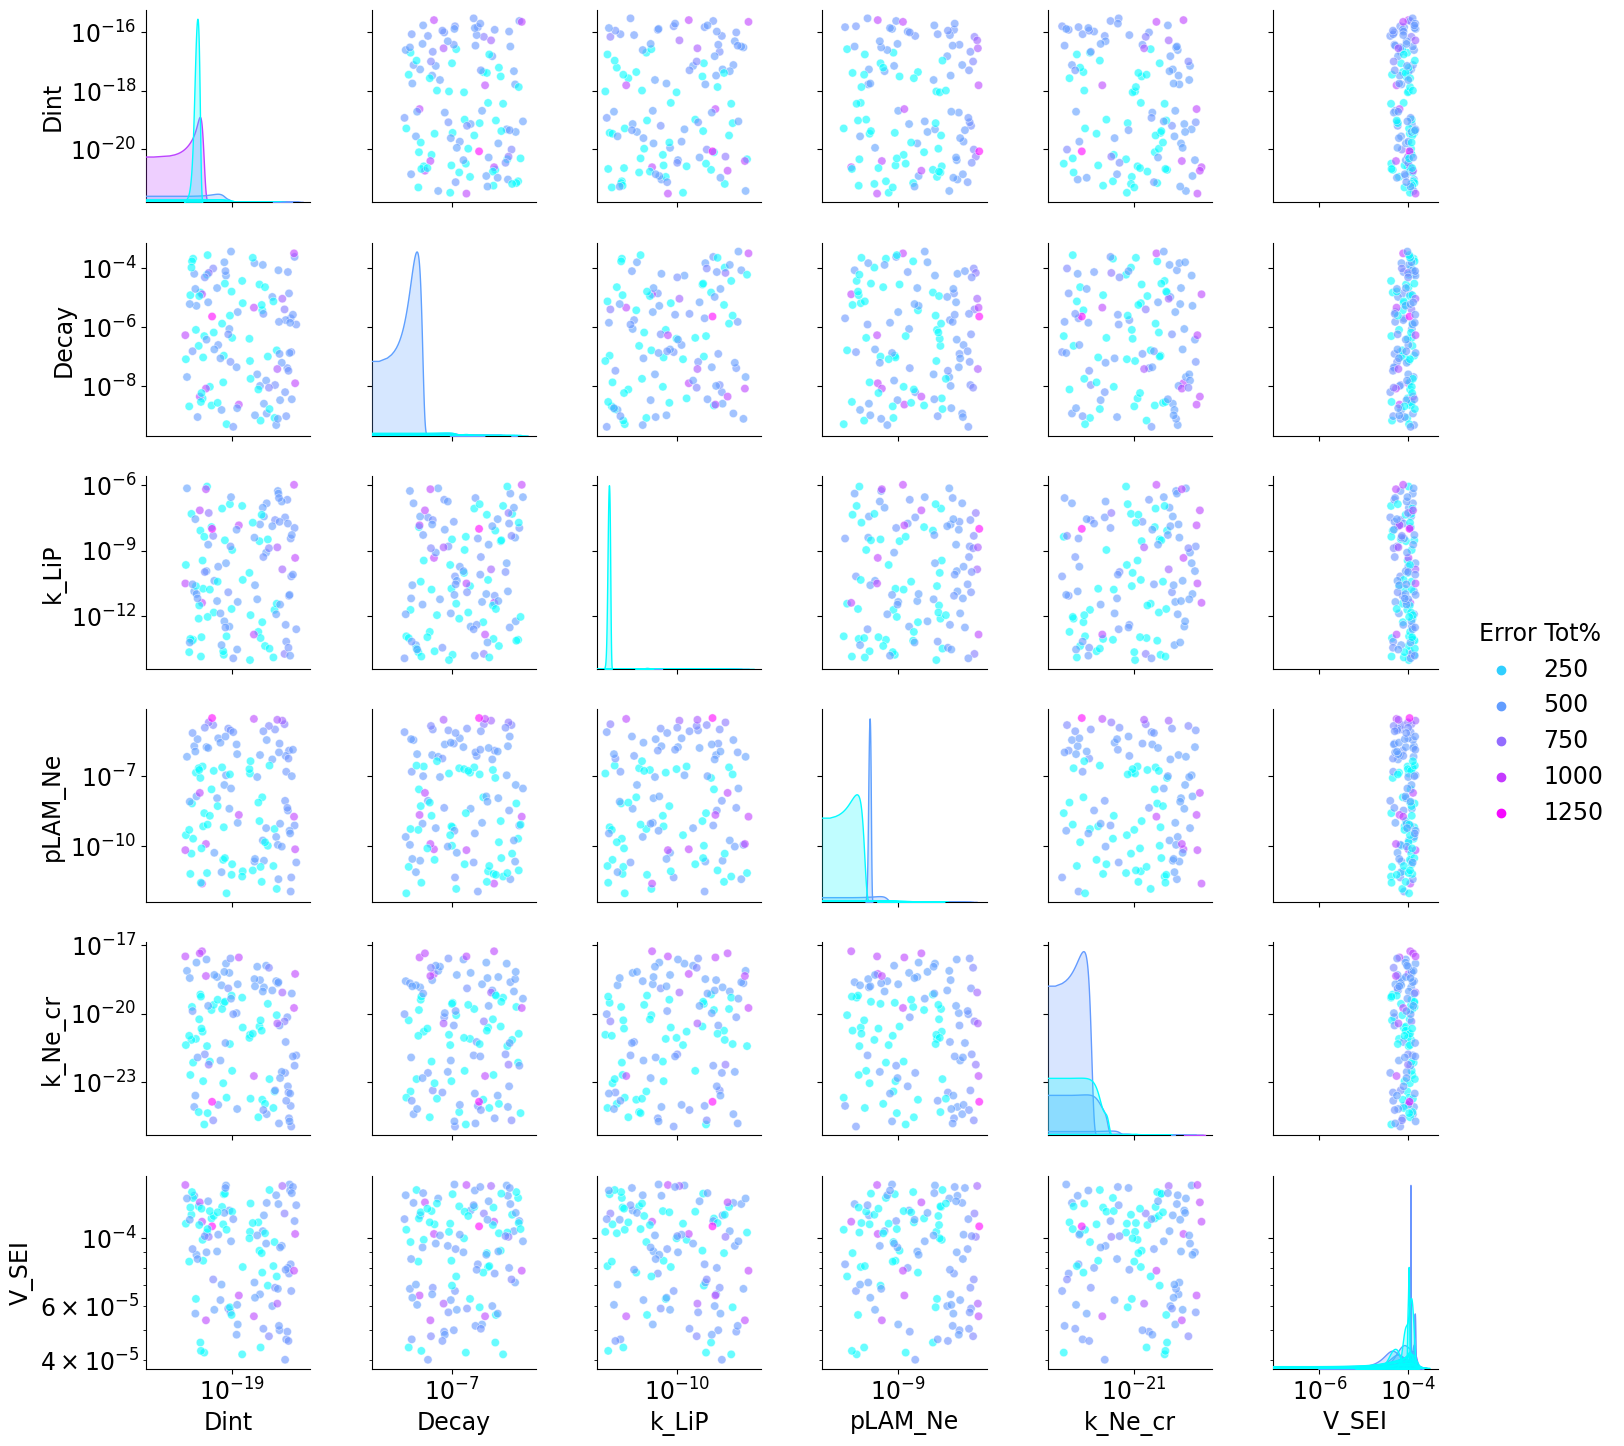

In [33]:
PlotPair(df, input_columns, output_column="Error Tot%")

In [35]:
import pandas as pd

# Assuming your DataFrame is named 'df'
df['Pass'] = df['Error Tot%'].apply(lambda x: 1.0 if x < 200 else 0.0)


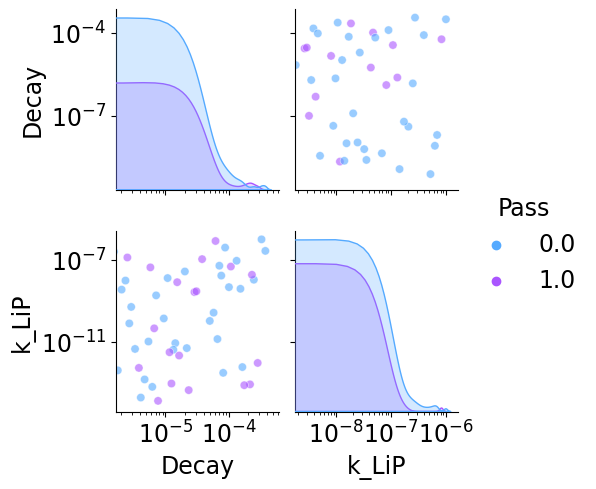

In [36]:
PlotPair(df, ["Decay","k_LiP",], "Pass")